In [3]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

In [4]:
pd.set_option('display.max_rows', None)
d1=pd.read_csv('Diabetes 2(in).csv')
print(d1.head())
d1.info()

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

In [ ]:

d2=d1.loc[(d1['Glucose']!=0) & (d1['BloodPressure']!=0) & 
           (d1['SkinThickness']!=0) & (d1['Insulin']!=0) & (d1['BMI']!=0)]

In [6]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 3 to 765
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               392 non-null    int64  
 1   Glucose                   392 non-null    int64  
 2   BloodPressure             392 non-null    int64  
 3   SkinThickness             392 non-null    int64  
 4   Insulin                   392 non-null    int64  
 5   BMI                       392 non-null    float64
 6   DiabetesPedigreeFunction  392 non-null    float64
 7   Age                       392 non-null    int64  
 8   Outcome                   392 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 30.6 KB


In [9]:
d1['Glucose'].replace(0,d2['Glucose'].mean(),inplace=True)
d1['BloodPressure'].replace(0,d2['BloodPressure'].mean(),inplace=True)
d1['SkinThickness'].replace(0,d2['SkinThickness'].mean(),inplace=True)
d1['Insulin'].replace(0,d2['Insulin'].mean(),inplace=True)
d1['BMI'].replace(0,d2['BMI'].mean(),inplace=True)

In [10]:
# splitting the dataset for training 
x=d1.iloc[:, 0:8] #independent var
y=d1.iloc[:,8] # Dependent var
print(x.shape)
print(y.shape)

(768, 8)
(768,)


In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [12]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(614, 8)
(614,)
(154, 8)
(154,)


In [13]:
#creating a randomforest classification model 

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=50, criterion="entropy", random_state=1)
classifier = classifier.fit(x_train, y_train)

In [14]:
y_pred = classifier.predict(x_test)

In [15]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0],
      dtype=int64)

In [16]:
d2=pd.DataFrame({'Actual Value':y_test, 'Predicted Value':y_pred})
d2.head()

,Actual Value,Predicted Value
285,0,0
101,0,0
581,0,0
352,0,0
726,0,0


In [17]:
# Model evaluation

print('Accuracy', metrics.accuracy_score(y_test,y_pred))

Accuracy 0.7987012987012987


In [ ]:
# Evalute with confusion matrix to know how well model performed 
cf= confusion_matrix(y_test, y_pred)

In [19]:
cf

array([[88, 11],
       [20, 35]], dtype=int64)

<Axes: >

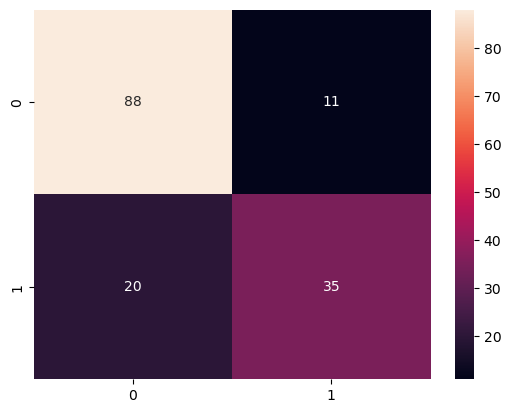

In [20]:
cf= confusion_matrix(y_test, y_pred)
sns.heatmap(cf, annot=True)

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85        99
           1       0.76      0.64      0.69        55

    accuracy                           0.80       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.80      0.80      0.79       154



In [24]:
# intro to gridsearchcv
# GridSearhCV to find the best hyperparameters for a RandomForestClassifier.
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators': range(30),
             'criterion': ['gini', 'entropy']}
c1 = RandomForestClassifier()
grid=GridSearchCV(c1, parameters, cv=10)
grid.fit(x,y)
print(grid.best_params_)
print(grid.best_estimator_)

{'criterion': 'entropy', 'n_estimators': 27}
RandomForestClassifier(criterion='entropy', n_estimators=27)


In [25]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.7604408749145593
{'criterion': 'entropy', 'n_estimators': 27}
RandomForestClassifier(criterion='entropy', n_estimators=27)
